# Steel Plate Defect Prediction
In this notebook, we will be predicting the defects in steel plates based on the given dataset. You can find the competition and the dataset [here](https://www.kaggle.com/competitions/playground-series-s4e3).

<div align="center">
<img src="https://www.kaggle.com/competitions/68699/images/header" />
</div>

## 1. Importing Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

### Configuration

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Loading Data

In [3]:
df = pd.read_csv('train.csv', index_col='id')

In [4]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
df.shape

(19219, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Empty_I

In [7]:
df.duplicated().sum()

np.int64(0)

## 3. Exploratory Data Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02


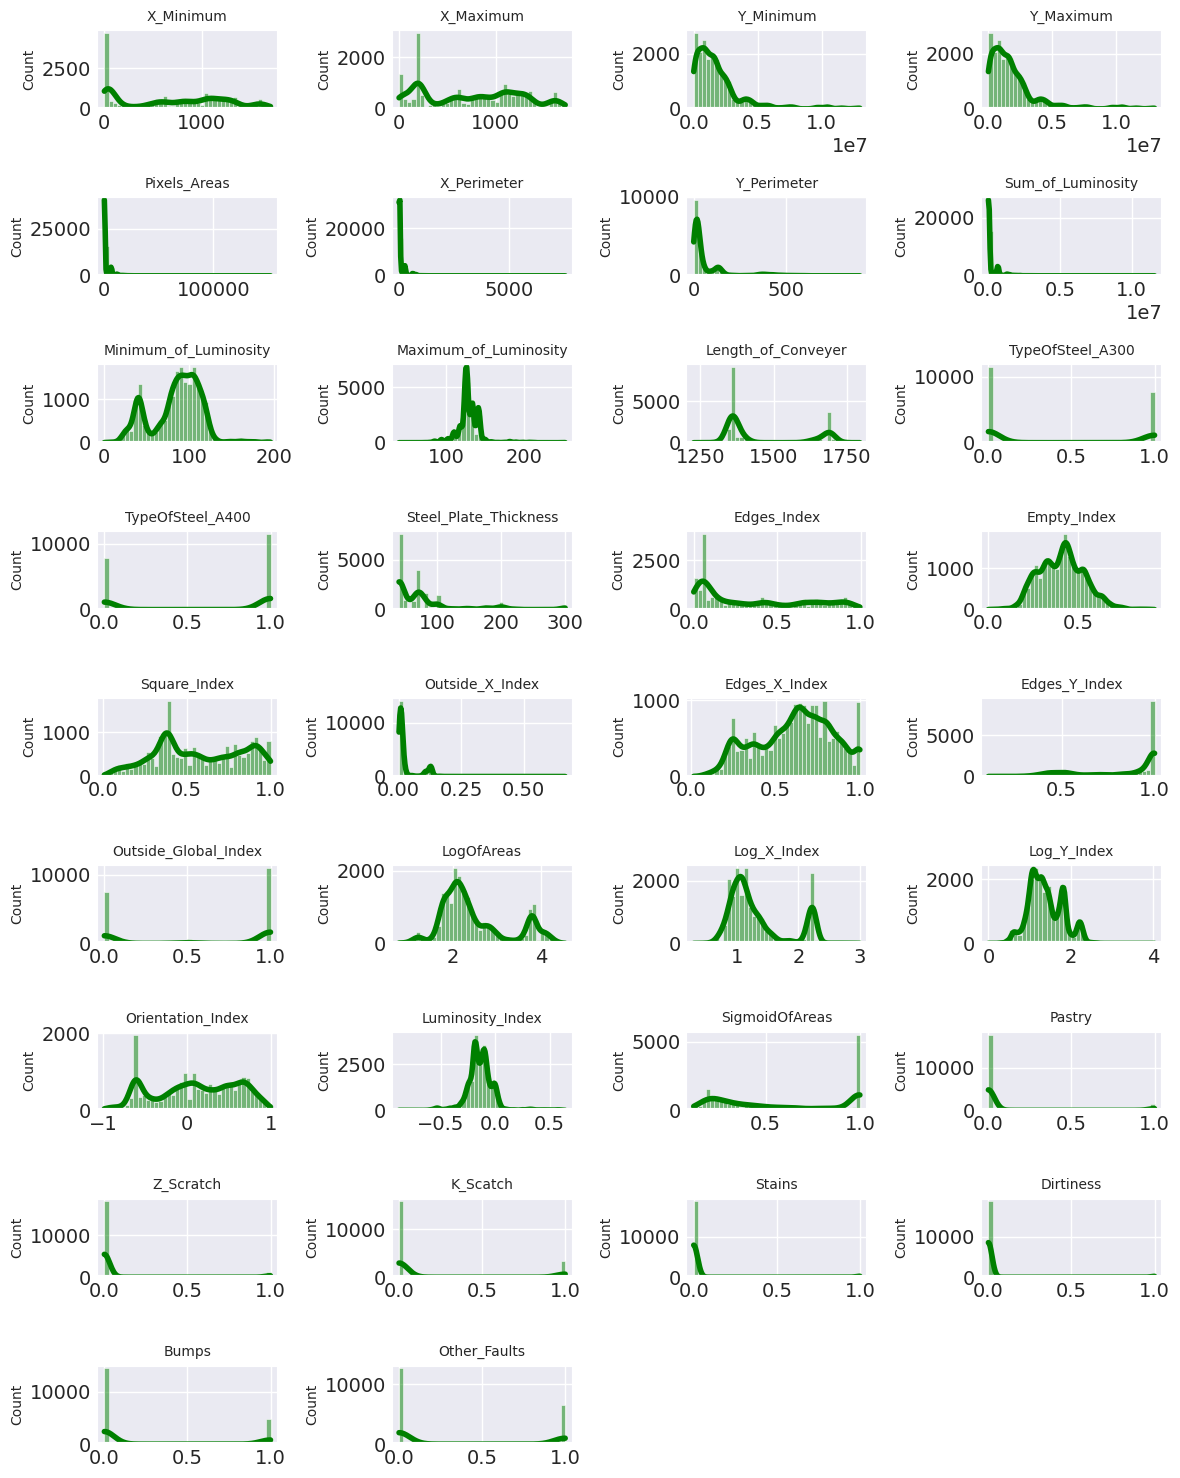

In [9]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df[c], bins=40, kde=True, color='g')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()

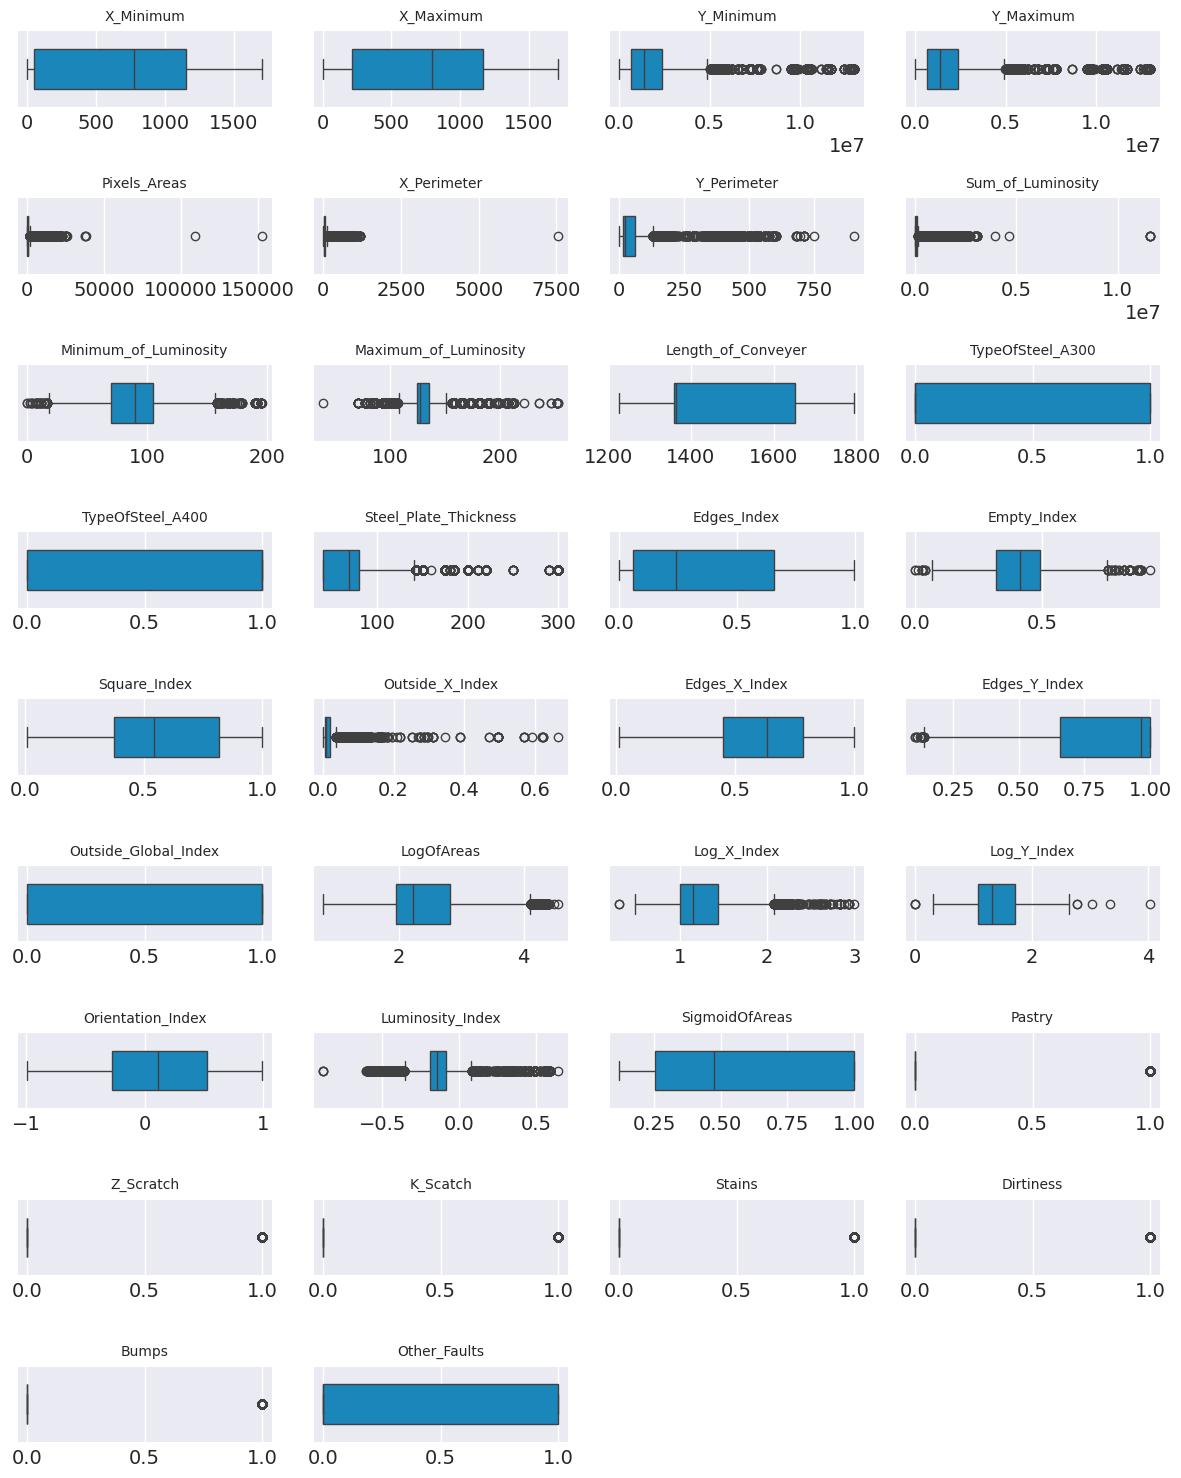

In [10]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(9, 4, i + 1)
    sns.boxplot(df[c], width=0.5, orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()

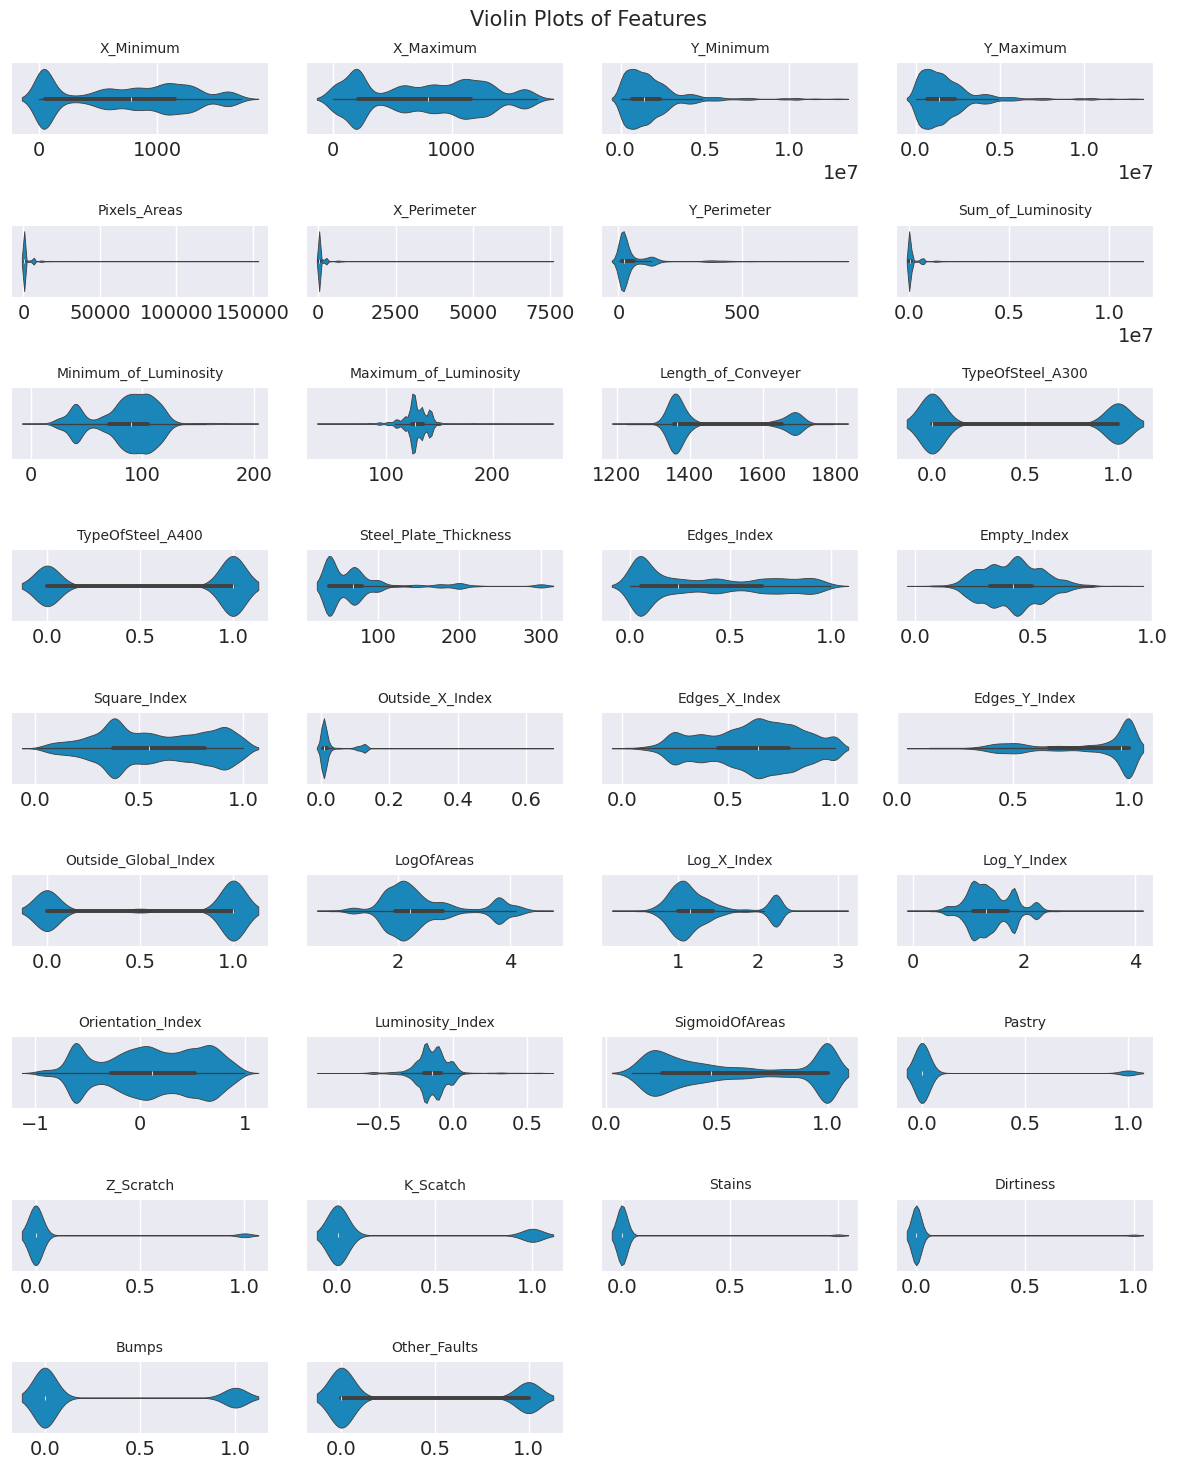

In [11]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns):
    plt.subplot(9, 4, i + 1)
    sns.violinplot(x=df[c], orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features', fontsize=15)
plt.tight_layout()

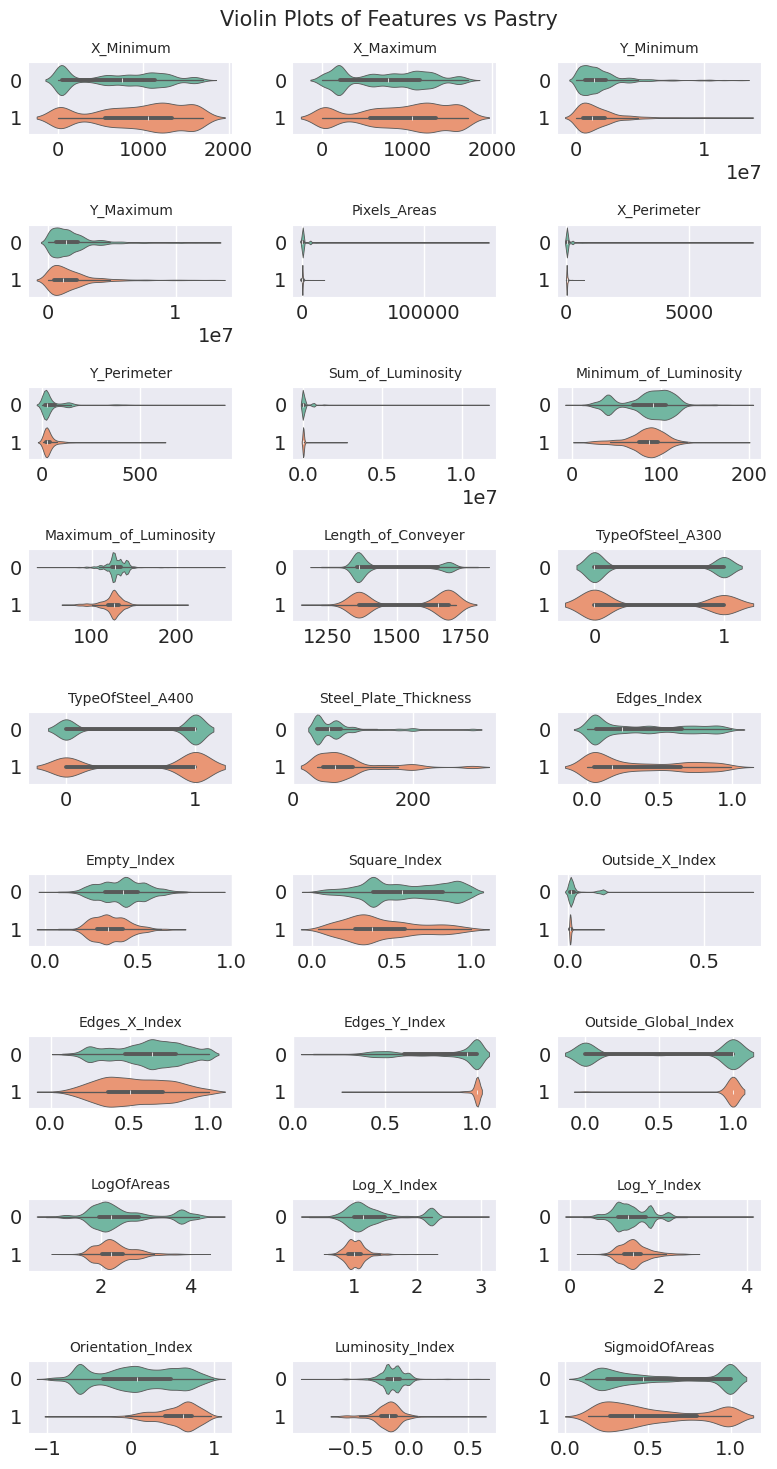

In [12]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Pastry'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Pastry', fontsize=15)
plt.tight_layout()

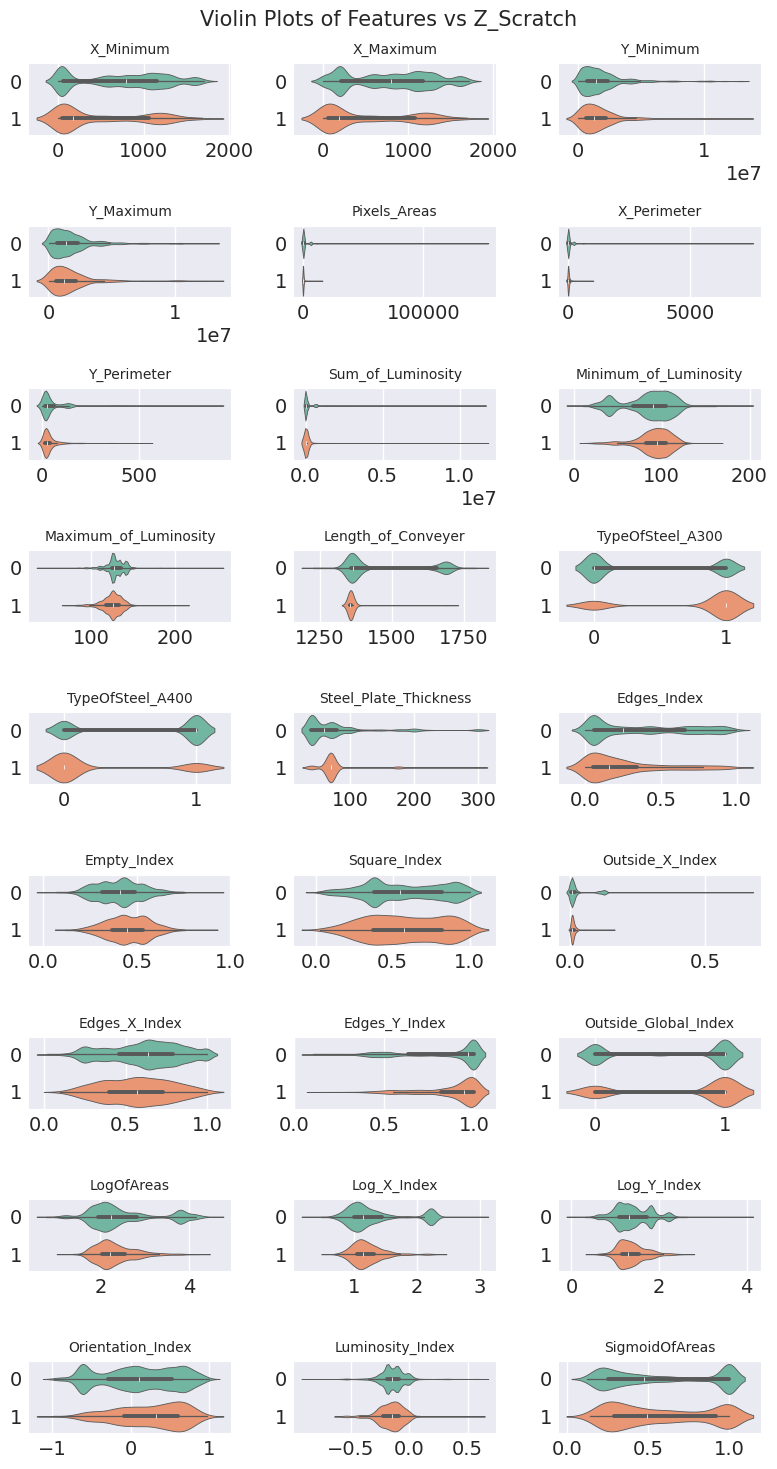

In [13]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Z_Scratch'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Z_Scratch', fontsize=15)
plt.tight_layout()

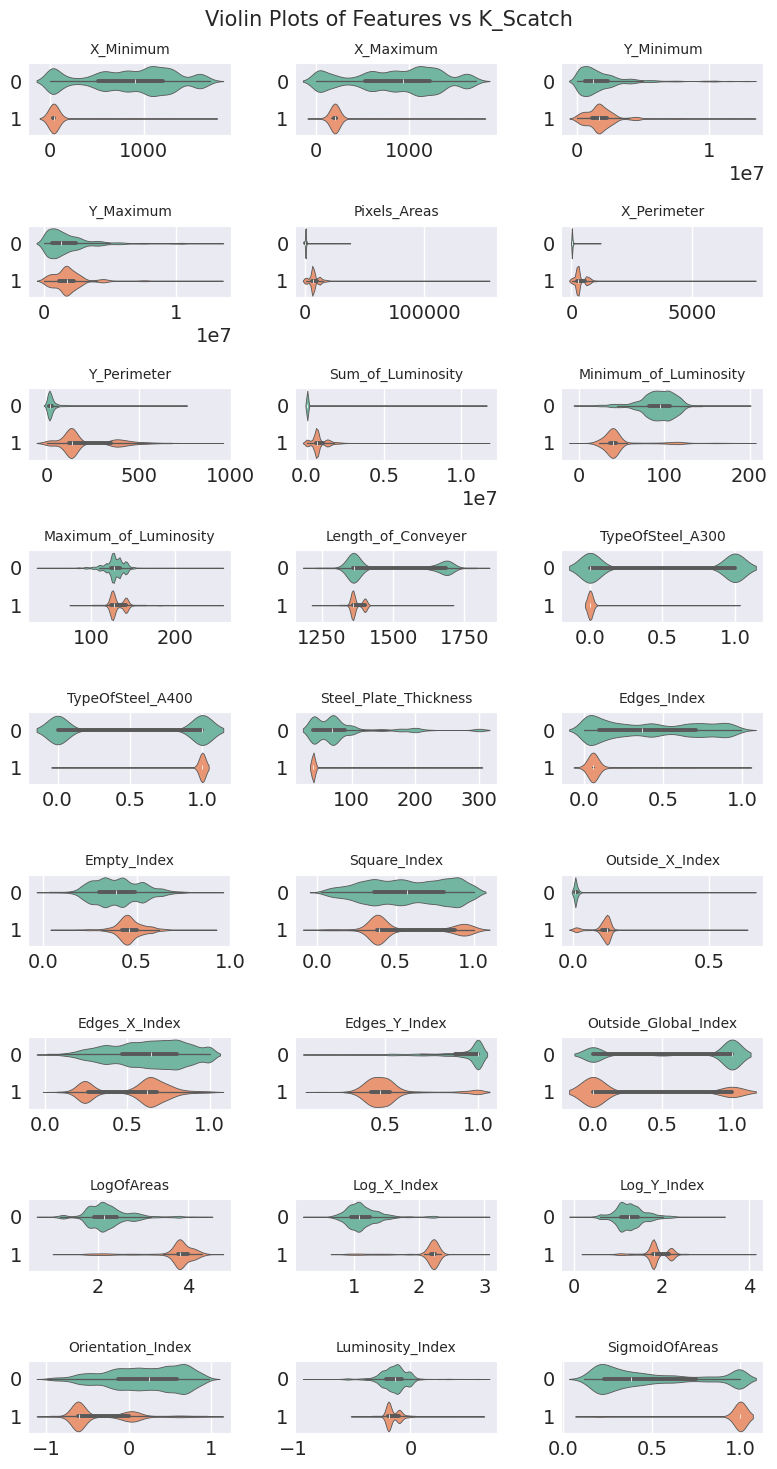

In [14]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['K_Scatch'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs K_Scatch', fontsize=15)
plt.tight_layout()

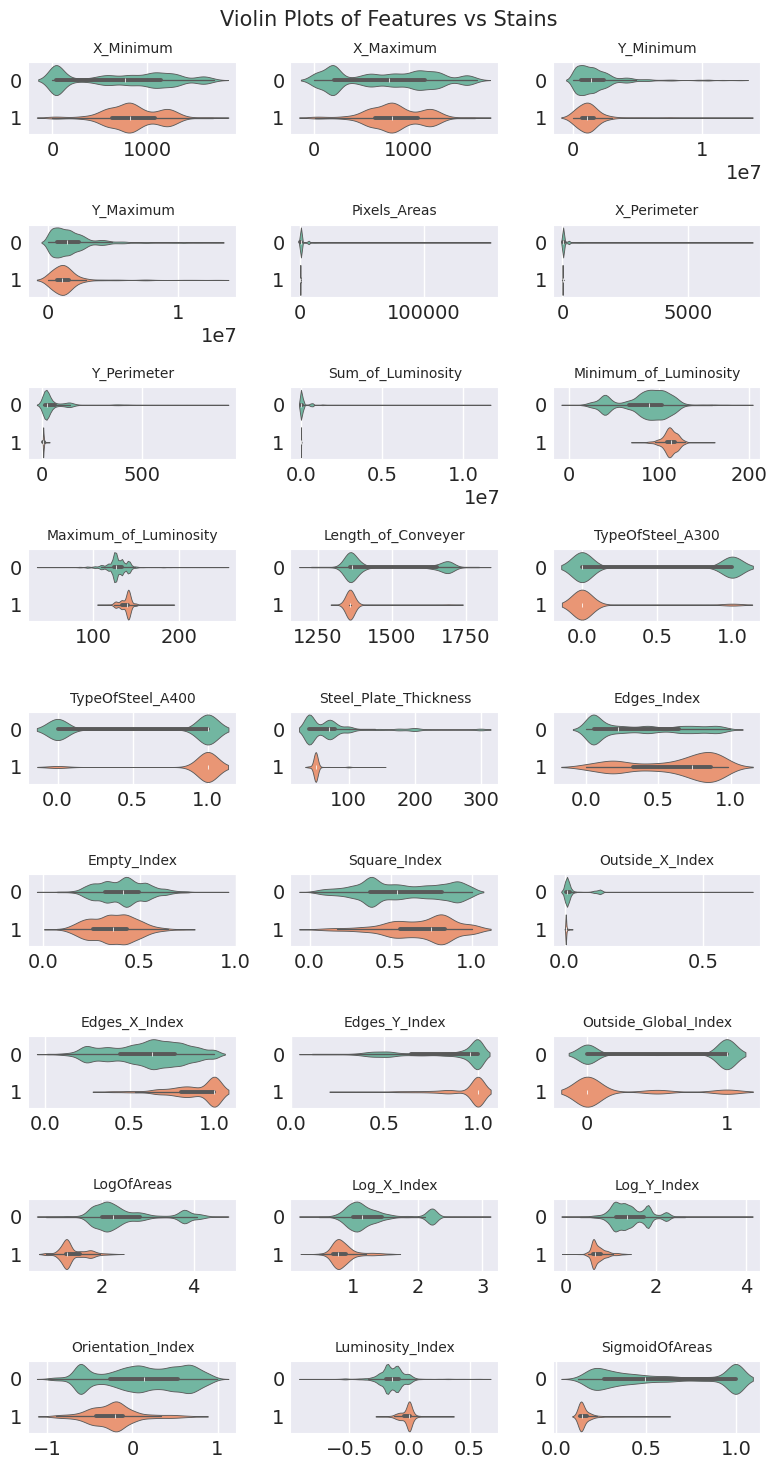

In [15]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Stains'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Stains', fontsize=15)
plt.tight_layout()

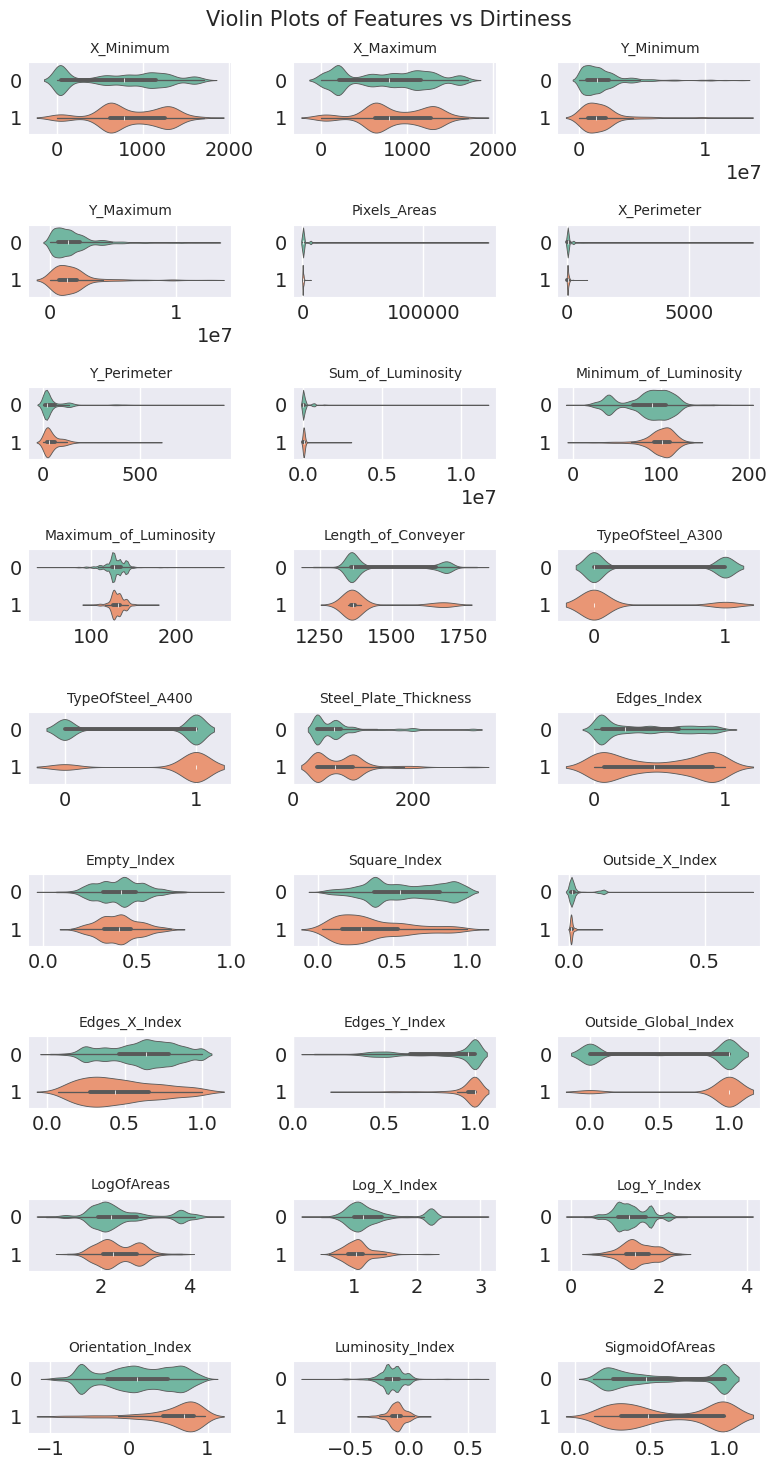

In [16]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Dirtiness'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Dirtiness', fontsize=15)
plt.tight_layout()

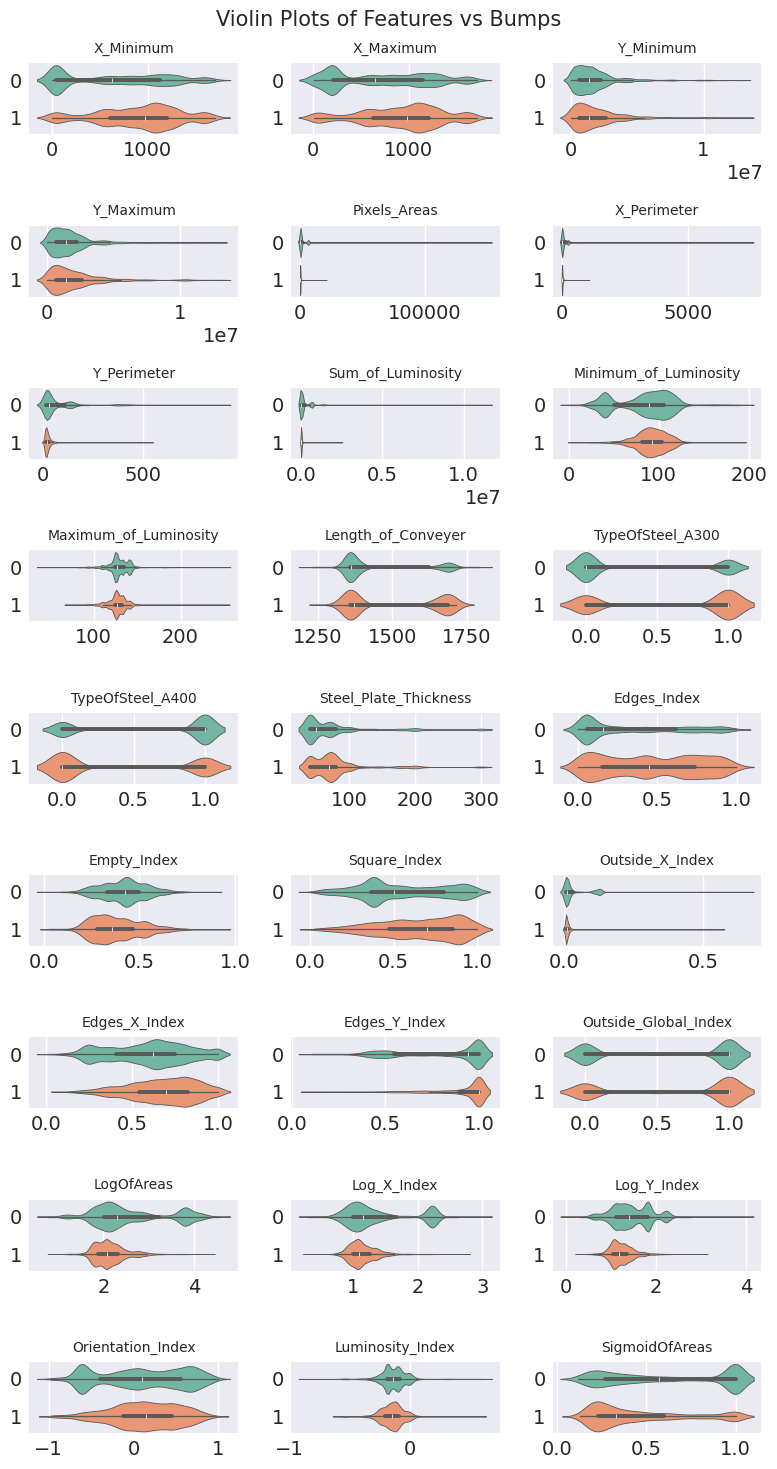

In [17]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Bumps'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Bumps', fontsize=15)
plt.tight_layout()

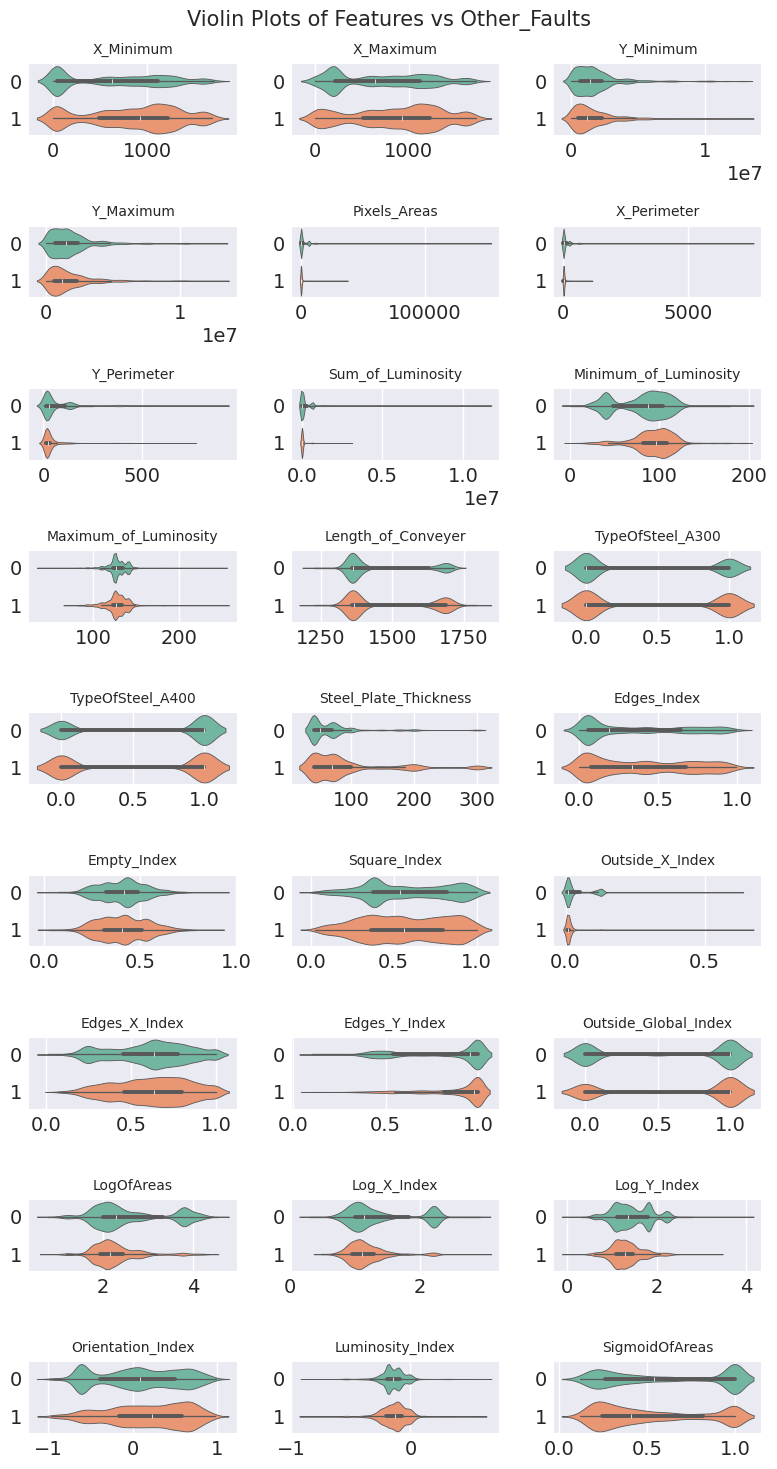

In [18]:
plt.figure(figsize=(8, 15))
for i, c in enumerate(df.columns[:-7]):
    plt.subplot(9, 3, i + 1)
    sns.violinplot(x=df[c], y=df['Other_Faults'], palette='Set2', orient='h')
    plt.title(c, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Violin Plots of Features vs Other_Faults', fontsize=15)
plt.tight_layout()

## 4. Data Preprocessing

In [19]:
x = df.drop(columns=df.iloc[:, -7:].columns)
y = df.iloc[:, -7:]

In [20]:
y.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [21]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## 5. Model Training

In [50]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
y_pred = model.predict(x_test)

print(f"Accuracy  : {accuracy_score(y_test, y_pred)}")
print(f"Precision : {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall    : {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score  : {f1_score(y_test, y_pred, average='macro')}")

Accuracy  : 0.42403746097814776
Precision : 0.5987491872270922
Recall    : 0.4652593390593512
F1 Score  : 0.4990968419819436


## 6. Save the model, Make Submission

In [54]:
joblib.dump(model, 'steel_plate_defect_prediction.pkl')

['steel_plate_defect_prediction.pkl']

In [58]:
test_df = pd.read_csv('test.csv', index_col='id')
x_sub = scaler.transform(test_df)
predictions = model.predict(x_sub)
submission = pd.DataFrame(predictions, index=test_df.index, columns=y.columns)
submission.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
19219,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19220,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19221,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19222,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19223,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
submission.to_csv('submission.csv')

## 7. Conclusion

This analysis successfully built a multi-label classification model for steel plate defect prediction using XGBoost. The model achieved moderate performance with 42.4% accuracy and 49.9% F1-score across 7 defect types. Key findings include:

- **Dataset**: 19,219 samples with 27 features describing steel plate characteristics
- **Model**: XGBoost classifier with MinMax scaling for feature normalization
- **Performance**: Balanced precision (59.9%) and recall (46.5%) across defect categories
- **Features**: Geometric measurements, luminosity indices, and steel type indicators proved most predictive

The model provides a solid foundation for automated steel quality control, though further feature engineering and hyperparameter tuning could improve performance.